In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cities = pd.read_csv("Cities.csv")

In [3]:
latitude = cities.latitude
temperature = cities.temperature

# Найдем коэффициент корреляции между широтой и температурой
corrmatrix = np.corrcoef(latitude, temperature)
print("Pearson's correlation coefficient is equal to %.3f"%corrmatrix[0,1] )

Pearson's correlation coefficient is equal to -0.824


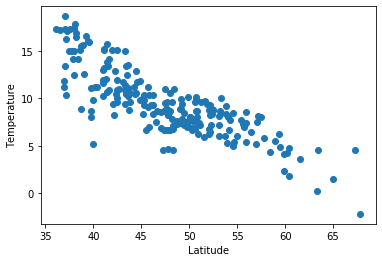

In [4]:
# Построим точечную диаграмму для двух этих переменных
plt.scatter(latitude,temperature)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

# Линейная регрессия, используя библиотеку Scipy Stats

In [5]:
# Линейная регрессия используя библиотеку Scipy Stats
import scipy
from scipy import stats

slope, intercept, r, p, stderror = scipy.stats.linregress(latitude, temperature)
print("Intercept: ", intercept)
print("Slope: ", slope)


Intercept:  30.208703834316513
Slope:  -0.4360190399891492


In [6]:
# Добавим на график линию, построенную с помощью коэффициентов, полученных от линейной регрессии

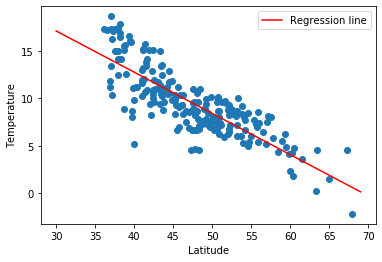

In [7]:
# Создадим х-координаты для линии
x_line = np.arange(30, 70)

# Координаты y можно найти используя уравнение линии y = intercept +  x*slope и подставляя туда значения х
y_line = intercept + slope*x_line

plt.scatter(latitude,temperature)
plt.plot(x_line, y_line, color='red', label='Regression line')

plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [8]:
# Используем линию регрессии для получения предсказаний для новых значений широты

new_latitude = np.array([18, 52, 48, 56])
pred_temperature = slope*new_latitude + intercept

for i in range(len(new_latitude)):
    print("The predicted temperature at latitude={} equals {:.2f}".format(new_latitude[i], pred_temperature[i]))

The predicted temperature at latitude=18 equals 22.36
The predicted temperature at latitude=52 equals 7.54
The predicted temperature at latitude=48 equals 9.28
The predicted temperature at latitude=56 equals 5.79


# Линейная регрессия, используя библиотеку Statmodels.api

In [9]:
# Линейная регрессия используя библиотеку Statmodels.api
import statsmodels.api as sm

x = cities['latitude']
x = sm.add_constant(x)
y = cities['temperature']

model = sm.OLS(y, x).fit()

# Cмотрим краткую сводку по модели линейной регрессии
model.summary()

/Users/angiemelomangie/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     446.6
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           5.46e-54
Time:                        21:03:33   Log-Likelihood:                -451.20
No. Observations:                 213   AIC:                             906.4
Df Residuals:                     211   BIC:                             913.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2087      0.990     30.522      0.000      28.258      32.160
latitude      -0.4360      0.021    -21.134      0.000      -0.477      -0.395
==============================================================================
Omnibus:                        4.012   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.610
Skew:                          -0.281   Prob(JB):                        0.164
Kurtosis:                       3.300   Cond. No.                         343.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Записываем коэффициенты регрессии в соответствующие переменные
intercept, slope = model.params
print("Intercept: ", intercept)
print("Slope: ", slope)

# Получаем коэффициент детерминации R-squared
print("R-squared = %.3f"%model.rsquared)

Intercept:  30.20870383431653
Slope:  -0.4360190399891496
R-squared = 0.679


# Линейная регрессия, используя библиотеку Sklearn

In [11]:
# Линейная регрессия,  используя библиотеку Sklearn
x = cities.latitude

# Тип переменной х сейчас - это Pandas Series. Однако библиотека SciKit-Learn требует, чтобы входные данные 
#  были в формате numpy.array. Поэтому мы используем соответствующую команду для конвертации
x = np.asarray(x)

# На данный момент х - это вектор c размерностью M. Однако для тренировки любой модели машинного обучения 
# SciKit-Learn требует, чтобы входные данные (input) были в формате матрицы с размерностью MxN. 
# Поэтому используем команду reshape(), чтобы изменить форму (размерность) вектора и превратить его в матрицу Mx1
x = x.reshape(-1,1)

y = cities.temperature.values # Берем значения температуры и сразу же конвертируем Series в numpy.array 
                              # с помощью аттрибута values

# Импортируем модель линейной регрессии из модуля linear_model
from sklearn.linear_model import LinearRegression

# Создаем объект модели линейной регресии
model = LinearRegression()

# Тренируем модель на входных данных при помощи метода fit()
model.fit(x, y)

# Получаем коэффициенты регресии с помощью аттрибутов coef_ и intercept_
print("Slope: ", model.coef_)
print("Intercept: ", model.intercept_)


# Получаем коэффициент детерминации R-squared с помощью метода score()
print("R^2: %.3f" % (model.score(x, y)))

Slope:  [-0.43601904]
Intercept:  30.208703834316534
R^2: 0.679


In [12]:
# Используем линию регрессии для получения предсказаний для новых значений широты
x_new = np.array([3, 12, 37, 89]).reshape(-1,1)

# Получаем предсказания от модели на новых входных данных при помощи метода predict()
y_pred = model.predict(x_new)

for i in range(len(x_new)):
    print("The predicted temperature at latitude={} equals {:.2f}".format(x_new[i,0], y_pred[i]))

The predicted temperature at latitude=3 equals 28.90
The predicted temperature at latitude=12 equals 24.98
The predicted temperature at latitude=37 equals 14.08
The predicted temperature at latitude=89 equals -8.60
